In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from datetime import datetime, timedelta
import bisect
import pandas as pd
import seaborn as sns
import pylab
import os
import glob
from ftplib import FTP
import fnmatch
import matplotlib.dates as mdates
import xarray as xr
#plot(x,y)
'''Optional: Specify the plotting style '''
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 15,\
                     'xtick.labelsize' : 15,\
                     'ytick.labelsize' : 15,\
                     'axes.titlesize' : 16,\
                     'axes.labelsize' : 16,\
                     'date.autoformatter.minute': '%H:%M' })

In [28]:
from netCDF4 import Dataset
import sys
#from mpl_toolkits.basemap import Basemap

In [29]:
os.chdir('C:\\Users\\lynnl\icon\ivm')
os.getcwd();

In [4]:
def modifyds(ds):
    return ds

In [5]:
def group1hr(ds):
    ##ds['slt']=ds['slt']*1000000
    #empty = xr.full_like(ds.isel(time_ms= 8639), 0)
#x_bins = np.r_[10.794853:9.081341:0.005950]
    dsg=ds.groupby_bins("slt", 24).mean()#reduce((mean, ['vmer','vzon']))#.mean(dim="vmer")
    #dsg['slt']=dsg['slt']/1000000
    return dsg
    

In [39]:
#nc=Dataset('ivm20200101.nc')
ds1=xr.open_dataset('icon_l2-7_ivm-a_20200101_v06r000.nc')
ds1=ds1.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
#ds1=ds1[[ 'time_ms',
#                   'vmer',
#                   'vzon',
#                   'Ni',
#                  'orb_num',
#                  'slt',
#                   'lon',
#                   'lat',
#                  'alt',
#                   'mlon',
#                 'mlat',
#                   'DM_flag',
#                 'RPA_flag']]
ds1=ds1.where(ds1.DM_flag==0)[[ 'time_ms',
                   'vmer',
                   'vzon',
                  'slt']]#,
                 # 'DM_flag',
                 #'RPA_flag']]
# downsample from 1s to 10s
ds1=ds1.isel(time_ms=slice(None,None,10))

#DM_Flag==0:good quality data
#ds1 = ds1.where(ds1.DM_Flag == 0)

ds1

<xarray.Dataset>
Dimensions:  (time_ms: 8640)
Coordinates:
  * time_ms  (time_ms) int64 1577836797776 1577836807776 ... 1577923186923
Data variables:
    vmer     (time_ms) float64 nan nan nan nan nan 50.36 ... nan nan nan nan nan
    vzon     (time_ms) float64 nan nan nan nan nan ... nan nan nan nan nan
    slt      (time_ms) float32 nan nan nan nan nan 10.99 ... nan nan nan nan nan
Attributes: (12/45)
    Discipline:                  Space Physics > Ionospheric Science
    Link_Title:                  ICON IVM
    Mission_Group:               Ionospheric Investigations
    Source_Name:                 ICON > Ionospheric Connection Explorer
    Data_Level:                  L2
    ADID_Ref:                    NASA Contract > NNG12FA45C
    ...                          ...
    pysat_version:               2.2.2
    File:                        ['/disks/icondata/Temporary/ICON.SDC.Pipelin...
    rpa_multi_fit_map:           1
    Generation_Date:             20220421
    Rules_of_Use:                Public Data for Scientific Use
    MOD:                         ['Version 001, R. A. Stoneback, 2019-08-06T0...

In [21]:
ds1g=group1hr(ds1)

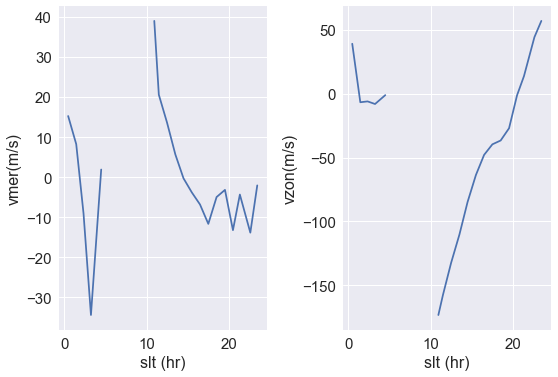

In [22]:
plt.subplot(1, 2, 1)
plt.plot(ds1g['slt'],ds1g['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(ds1g['slt'],ds1g['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout();

In [32]:
ds2=xr.open_dataset('icon_l2-7_ivm-a_20200102_v06r000.nc')
ds2=ds2.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
ds2=ds2.where(ds2.DM_flag==0)[[ 'time_ms',
                   'vmer',
                   'vzon',
                  'slt',
                  ]]
ds2=ds2.isel(time_ms=slice(None,None,10))


In [25]:
ds = xr.concat([ds1, ds2], dim='time_ms')

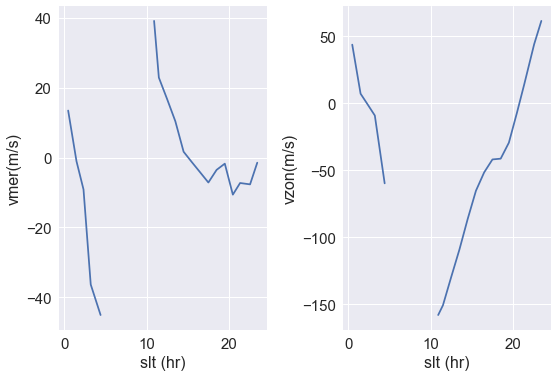

In [26]:
dsg=group1hr(ds)
plt.subplot(1, 2, 1)
plt.plot(dsg['slt'],dsg['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(dsg['slt'],dsg['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout();

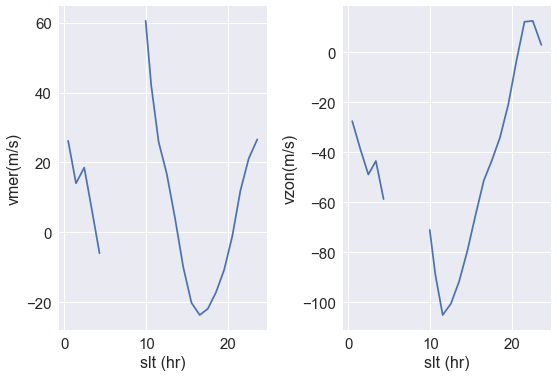

In [40]:
for j in ['02','03','04','05','06','07','08','09','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']:
        bil='C:\\Users\\lynnl\\icon\\ivm\\icon_l2-7_ivm-a_202001'+j+'_v06r000.nc'#PRISM_ppt_stable_4kmM2_'+str(i)+j+'_bil.bil'#
        ds=xr.open_dataset(bil)
        ds=ds.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
        ds=ds.where((ds.DM_flag==0)&(ds.RPA_flag==0))[[ 'time_ms',
                   'vmer',
                   'vzon',
                  'slt',
                   ]]
        ds=ds.isel(time_ms=slice(None,None,10))
        
        ds1=xr.concat([ds1, ds],dim='time_ms')
        #ds1=xr.merge([ds1, ds])
        ##df1 = pd.DataFrame(data={'year':year,'month':month,'min': np.nanmin(data1), 'max': np.nanmax(data1),'mean':np.nanmean(data1),'median':np.nanmedian(data1),'std':np.nanstd(data1)},index=[0])
        ##df1
        ##df0=pd.concat([df0, df1]) 
ds1g=group1hr(ds1)
        
plt.subplot(1, 2, 1)
plt.plot(ds1g['slt'],ds1g['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(ds1g['slt'],ds1g['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout();


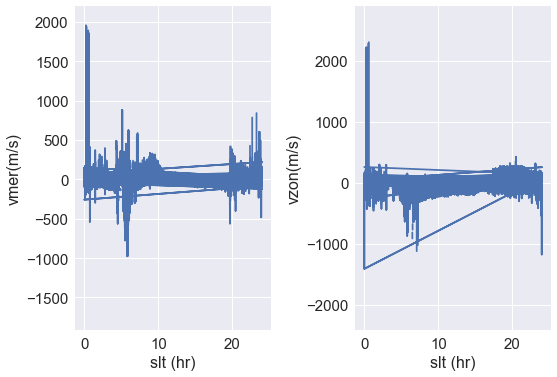

In [12]:
for j in ['02','03','04','05','06','07','08','09','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']:
        bil='C:\\Users\\lynnl\\icon\\ivm\\icon_l2-7_ivm-a_202001'+j+'_v06r000.nc'#PRISM_ppt_stable_4kmM2_'+str(i)+j+'_bil.bil'#
        ds=xr.open_dataset(bil)
        ds=ds.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
        ds=ds[[ 'time_ms',
                   'vmer',
                   'vzon',
                  'slt',
                   ]]
        ds=ds.isel(time_ms=slice(None,None,10))
        ds=group1hr(ds)
        ds1=xr.concat([ds1, ds],dim='slt_bins')
        #ds1=xr.merge([ds1, ds])
        ##df1 = pd.DataFrame(data={'year':year,'month':month,'min': np.nanmin(data1), 'max': np.nanmax(data1),'mean':np.nanmean(data1),'median':np.nanmedian(data1),'std':np.nanstd(data1)},index=[0])
        ##df1
        ##df0=pd.concat([df0, df1]) 

        
plt.subplot(1, 2, 1)
plt.plot(ds1['slt'],ds1['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(ds1['slt'],ds1['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout();


Text(0, 0.5, 'vzon(m/s)')

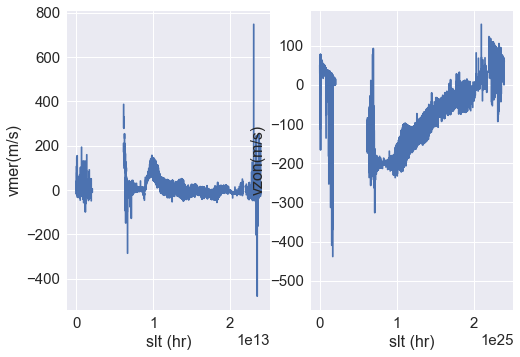

In [40]:
plt.subplot(1, 2, 1)
plt.plot(group5min(ds1)['slt'],group5min(ds1)['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(group5min(ds1)['slt'],group5min(ds1)['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout()

In [ ]:

ds2=xr.open_dataset('icon_l2-7_ivm-a_20200102_v06r000.nc')
ds2=ds2.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
ds2=ds2[[ 'time_ms',
                   'vmer',
                   'vzon',
                   'Ni',
                  'orb_num',
                  'slt',
                   'lon',
                   'lat',
                  'alt',
                   'mlon',
                 'mlat',
                   'DM_flag',
                 'RPA_flag']]
ds2=ds2.isel(time_ms=slice(None,None,10))
#DM_Flag==0:good quality data
#ds1 = ds1.where(ds1.DM_Flag == 0)

ds2

TypeError: concat() missing 1 required positional argument: 'dim'

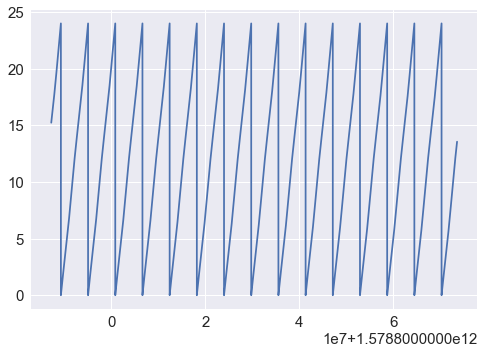

In [22]:
plt.plot(ds['time_ms'],ds['slt']);

In [42]:
def group5min(ds):
    ds['slt']=ds['slt']*1000000
    empty = xr.full_like(ds.isel(time_ms= 8639), 0)
#x_bins = np.r_[10.794853:9.081341:0.005950]
    dsg=ds.groupby_bins("slt", 5950).mean()#reduce((mean, ['vmer','vzon']))#.mean(dim="vmer")
    dsg['slt']=dsg['slt']/1000000
    return dsg

In [41]:
def group20min(ds):
    ds['slt']=ds['slt']*1000000
    empty = xr.full_like(ds.isel(time_ms= 8639), 0)
#x_bins = np.r_[10.794853:9.081341:0.005950]
    dsg=ds.groupby_bins("slt", 5950*4).mean()#reduce((mean, ['vmer','vzon']))#.mean(dim="vmer")
    dsg['slt']=dsg['slt']/1000000
    return dsg
    

In [7]:
ds1['slt']=ds1['slt']*1000000
empty = xr.full_like(ds1.isel(time_ms= 86399), 0)
#x_bins = np.r_[10.794853:9.081341:0.005950]
dsg=ds1.groupby_bins("slt", 5950).mean()#reduce((mean, ['vmer','vzon']))#.mean(dim="vmer")
dsg['slt']=dsg['slt']/1000000

Text(0, 0.5, 'vzon(m/s)')

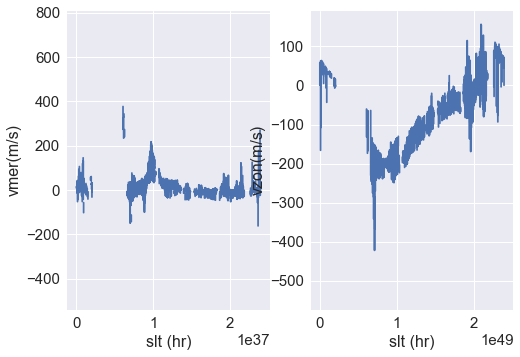

In [43]:
plt.subplot(1, 2, 1)
plt.plot(group20min(ds1)['slt'],group20min(ds1)['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(group20min(ds1)['slt'],group20min(ds1)['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout()

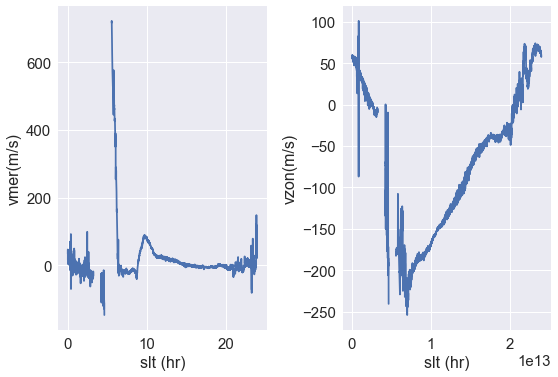

In [18]:
plt.subplot(1, 2, 1)
plt.plot(group5min(ds2)['slt'],group5min(ds2)['vmer']);#northsouth
plt.xlabel('slt (hr)')
plt.ylabel('vmer(m/s)')


plt.subplot(1, 2, 2)
plt.plot(group5min(ds2)['slt'],group5min(ds2)['vzon']);#eastwest
plt.xlabel('slt (hr)')
plt.ylabel('vzon(m/s)')
plt.tight_layout()

In [20]:
os.chdir('C:\\Users\\lynnl\icon\ivm')
os.getcwd()
ds3=xr.open_dataset('icon_l2-7_ivm-a_20200103_v06r000.nc')
ds3=ds3.rename({'Epoch': 'time_ms',
                  'ICON_L27_Ion_Velocity_Meridional': 'vmer',
                  'ICON_L27_Ion_Velocity_Zonal': 'vzon',
                  'ICON_L27_Ion_Density': 'Ni',
                  'ICON_L27_Orbit_Number': 'orb_num',
                  'ICON_L27_Solar_Local_Time': 'slt',
                  'ICON_L27_Longitude': 'lon',
                  'ICON_L27_Latitude': 'lat',
                  'ICON_L27_Altitude': 'alt',
                  'ICON_L27_Magnetic_Longitude': 'mlon',
                  'ICON_L27_Magnetic_Latitude': 'mlat',
                  'ICON_L27_DM_Flag': 'DM_flag',
                  'ICON_L27_RPA_Flag': 'RPA_flag'
                  })
ds3=ds3[[ 'time_ms',
                   'vmer',
                   'vzon',
                   'Ni',
                  'orb_num',
                  'slt',
                   'lon',
                   'lat',
                  'alt',
                   'mlon',
                 'mlat',
                   'DM_flag',
                 'RPA_flag']]


In [47]:
ds1

<xarray.Dataset>
Dimensions:   (slt_bins: 23800)
Coordinates:
  * slt_bins  (slt_bins) object (-2.2510915052611377e+64, 2.4932597626290216e...
Data variables:
    vmer      (slt_bins) float64 -0.774 nan nan nan nan ... nan 196.4 nan nan
    vzon      (slt_bins) float64 50.54 nan nan nan nan ... nan nan 54.3 nan nan
    Ni        (slt_bins) float64 2.926e+04 1.653e+04 nan ... nan 2.384e+04
    orb_num   (slt_bins) float64 1.238e+03 1.231e+03 nan ... nan 1.23e+03
    slt       (slt_bins) float64 1.485e+69 3.008e+69 nan ... 2.4e+73 nan 2.4e+73
    lon       (slt_bins) float32 58.2 227.0 nan nan nan ... nan 82.23 nan 251.0
    lat       (slt_bins) float32 22.76 21.82 nan nan nan ... nan 22.6 nan 21.66
    alt       (slt_bins) float32 594.9 595.2 nan nan nan ... nan 594.9 nan 595.2
    mlon      (slt_bins) float32 131.9 295.9 nan nan nan ... nan 155.9 nan 320.7
    mlat      (slt_bins) float32 17.42 25.3 nan nan nan ... nan 16.72 nan 29.12
    DM_flag   (slt_bins) float64 1.0 3.0 nan nan nan nan ... nan nan 3.0 nan 3.0
    RPA_flag  (slt_bins) float64 1.0 1.0 nan nan nan nan ... nan nan 1.0 nan 1.0

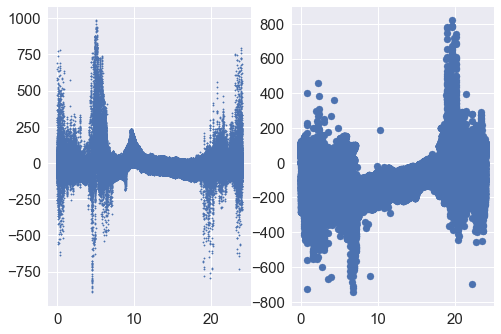

In [6]:
#local time vzon
plt.subplot(1, 2, 1)
plt.scatter(ds1['slt'],ds1['vmer'], s=2);

#xaxis horizontal lines not real data
#split lines and find the ave behavior
plt.subplot(1, 2, 2)
plt.scatter(ds1['slt'],ds1['vzon']);